In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

ModuleNotFoundError: No module named 'pandas'

In [95]:
# Load the dataset
noise_margin_data = pd.read_csv('noise_margin_dataset.csv')
X = noise_margin_data.iloc[:,:-1].values
y = noise_margin_data.iloc[:,-1].values.reshape(-1,1)
noise_margin_data

,Vdd,Vth,Temperature,Load_Capacitance,Noise_Margin
0,1.861442,0.864623,53.258797,1.578969e-10,Low
1,3.186643,0.821577,70.867659,9.641326e-11,High
2,2.683586,0.680830,34.921550,1.388013e-10,Medium
3,2.376915,0.794570,69.683703,4.740159e-10,Medium
4,1.358843,0.692077,45.308135,8.846495e-10,Low
...,...,...,...,...,...
99995,2.822301,0.897720,34.281066,7.503981e-10,Medium
99996,2.792282,0.903376,87.563144,2.732553e-10,Medium
99997,2.551243,0.553763,87.666166,5.760131e-10,Medium
99998,2.148729,0.922466,29.764994,8.934465e-10,Low


In [96]:
print(X)

[[1.86144227e+00 8.64623235e-01 5.32587967e+01 1.57896923e-10]
 [3.18664290e+00 8.21577320e-01 7.08676591e+01 9.64132572e-11]
 [2.68358607e+00 6.80829560e-01 3.49215498e+01 1.38801260e-10]
 ...
 [2.55124284e+00 5.53762941e-01 8.76661663e+01 5.76013109e-10]
 [2.14872866e+00 9.22466152e-01 2.97649944e+01 8.93446451e-10]
 [1.89678952e+00 4.01248064e-01 9.54077245e+01 5.02920228e-10]]


In [97]:
print(y)

[['Low']
 ['High']
 ['Medium']
 ...
 ['Medium']
 ['Low']
 ['Low']]


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_rf = y_test
X_train_rf = X_train
y_train_rf = y_train
X_test_rf = X_test

In [99]:
# 4. Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [100]:
# Evaluate Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_predictions

array(['Low', 'Low', 'Low', ..., 'Low', 'Medium', 'Medium'], dtype=object)

In [101]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy:  0.9869


In [102]:
# Data mapping for
XGBoost_Data = noise_margin_data.copy()
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
XGBoost_Data['Noise_Margin'] = noise_margin_data['Noise_Margin'].map(mapping)

print(XGBoost_Data)

X = XGBoost_Data.iloc[:,:-1].values
y = XGBoost_Data.iloc[:,-1].values.reshape(-1,1)

            Vdd       Vth  Temperature  Load_Capacitance  Noise_Margin
0      1.861442  0.864623    53.258797      1.578969e-10             0
1      3.186643  0.821577    70.867659      9.641326e-11             2
2      2.683586  0.680830    34.921550      1.388013e-10             1
3      2.376915  0.794570    69.683703      4.740159e-10             1
4      1.358843  0.692077    45.308135      8.846495e-10             0
...         ...       ...          ...               ...           ...
99995  2.822301  0.897720    34.281066      7.503981e-10             1
99996  2.792282  0.903376    87.563144      2.732553e-10             1
99997  2.551243  0.553763    87.666166      5.760131e-10             1
99998  2.148729  0.922466    29.764994      8.934465e-10             0
99999  1.896790  0.401248    95.407724      5.029202e-10             0

[100000 rows x 5 columns]


In [103]:
print(X)

[[1.86144227e+00 8.64623235e-01 5.32587967e+01 1.57896923e-10]
 [3.18664290e+00 8.21577320e-01 7.08676591e+01 9.64132572e-11]
 [2.68358607e+00 6.80829560e-01 3.49215498e+01 1.38801260e-10]
 ...
 [2.55124284e+00 5.53762941e-01 8.76661663e+01 5.76013109e-10]
 [2.14872866e+00 9.22466152e-01 2.97649944e+01 8.93446451e-10]
 [1.89678952e+00 4.01248064e-01 9.54077245e+01 5.02920228e-10]]


In [104]:
print(y)

[[0]
 [2]
 [1]
 ...
 [1]
 [0]
 [0]]


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# 5. XGBoost Model with Hyperparameters
xgboost_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [107]:
# Evaluate XGBoost model
xgb_predictions = xgboost_model.predict(X_test)
print("XGBoost Accuracy: ", accuracy_score(y_test, xgb_predictions))

XGBoost Accuracy:  0.99095


In [108]:
# Predictions for XGBoost model
xgb_pred = xgboost_model.predict(X_test)

In [109]:
# Accuracy scores for XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_pred)

In [110]:
# Accuracy Compared
print("Random Forest Accuracy: ", rf_accuracy)
print("XGBoost Accuracy: ", xgb_accuracy)

Random Forest Accuracy:  0.9869
XGBoost Accuracy:  0.99095


In [111]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve, f1_score, roc_curve, auc
# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test_rf, rf_predictions))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.95      0.96      1013
         Low       0.99      0.99      0.99     11897
      Medium       0.98      0.98      0.98      7090

    accuracy                           0.99     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11897
           1       0.99      0.99      0.99      7090
           2       0.97      0.97      0.97      1013

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000



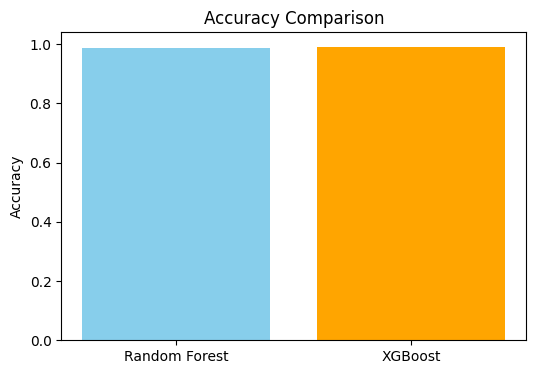

In [112]:
# Plot accuracy comparison
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest', 'XGBoost'], [rf_accuracy, xgb_accuracy], color=['skyblue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

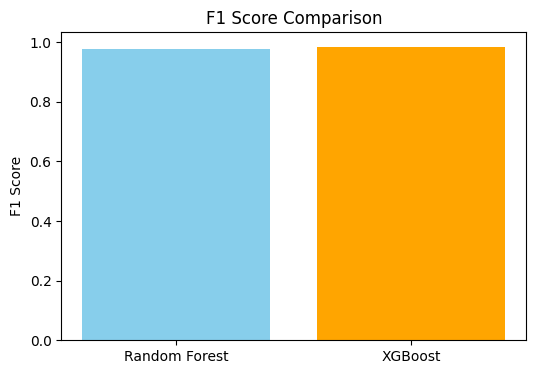

In [113]:
# F1 Scores
rf_f1 = f1_score(y_test_rf, rf_predictions, average='macro')
xgb_f1 = f1_score(y_test, xgb_pred, average='macro')

# Plot F1 Score Comparison
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest', 'XGBoost'], [rf_f1, xgb_f1], color=['skyblue', 'orange'])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
plt.show()